# Multi-output example for susi.SOMRegressor

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler

# --- for running the script without pip
import sys
sys.path.append("../")
# ---

import susi
from susi.SOMPlots import plot_estimation_map

## Read in data

In [2]:
cali = fetch_california_housing()
n_datapoints: int = 100
X = cali.data[:n_datapoints]
y = np.array([cali.target[:n_datapoints], cali.target[:n_datapoints]]).T

# preprocessing
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Regression

In [3]:
som = susi.SOMRegressor(
    n_rows=35,
    n_columns=35,
    n_iter_unsupervised=2500,
    n_iter_supervised=2500)

mor = MultiOutputRegressor(estimator=som, n_jobs=2)

In [4]:
# NBVAL_IGNORE_OUTPUT
mor.fit(X, y)

MultiOutputRegressor(estimator=SOMRegressor(n_columns=35,
                                            n_iter_supervised=2500,
                                            n_iter_unsupervised=2500,
                                            n_rows=35),
                     n_jobs=2)

In [5]:
y_pred = mor.predict(X)

In [6]:
# NBVAL_IGNORE_OUTPUT

print("R2 (both variables): {0:.1f} %".format(r2_score(y, y_pred)*100))
print("R2 (first variable): {0:.1f} %".format(r2_score(y[:, 0], y_pred[:, 0])*100))
print("R2 (first variable): {0:.1f} %".format(r2_score(y[:, 1], y_pred[:, 1])*100))

R2 (both variables): 77.5 %
R2 (first variable): 79.5 %
R2 (first variable): 75.5 %


## Plots

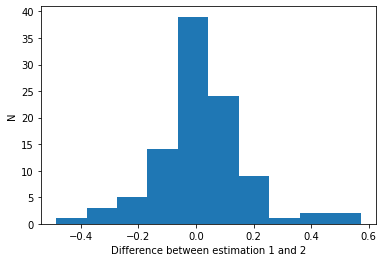

In [7]:
plt.hist([est[0]-est[1] for est in y_pred])
plt.xlabel("Difference between estimation 1 and 2")
plt.ylabel("N")
plt.show()

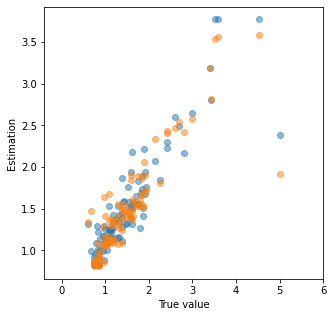

In [8]:
plt.figure(figsize=(5, 5))
plt.scatter(y[:, 0], y_pred[:, 0], alpha=0.5)
plt.scatter(y[:, 1], y_pred[:, 1], alpha=0.5)

# define plot limits
min_lim = min(y.min(), y_pred.min())
max_lim = max(y.max(), y_pred.max())
plt.xlim(min_lim-1, max_lim+1)
plt.xlim(min_lim-1, max_lim+1)

plt.xlabel("True value")
plt.ylabel("Estimation")

plt.show()

## Plot estimation map

Estimator no. 0:


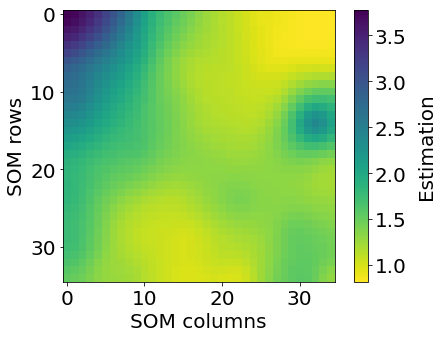

Estimator no. 1:


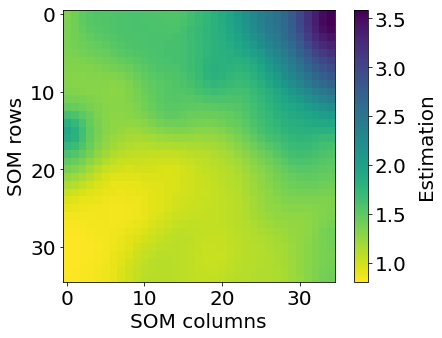

In [9]:
for i in range(2):
    print(f"Estimator no. {i}:")
    som_tmp = mor.estimators_[i]
    estimation_map = np.squeeze(som_tmp.get_estimation_map())
    plot_estimation_map(
        estimation_map, cbar_label="Estimation", cmap="viridis_r")
    plt.show()